# Customer Churn Prediction at SyriaTel








## 1. Business Understanding

### Stakeholder Audience
The primary stakeholders for this project are customer retention and marketing teams at a telecommunications company, as well as customer service managers and senior leadership.

### Business Problem
Customer churn leads to lost revenue and increased costs associated with acquiring new customers. By identifying customers who are likely to churn before they leave, the business can prioritize outreach, improve customer service experiences, and design targeted retention offers.



## 2. Data Understanding

### Why This Dataset Is Appropriate
The dataset includes customer demographics, service plans, call usage behavior, and customer service interaction data. These variables are directly relevant to churn behavior, making the dataset well-suited for a supervised classification task focused on churn prediction.

### import packages, read_csv and create dataframe

In [349]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV



In [325]:
# Loading the Dataset

df = pd.read_csv('../Data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [326]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [327]:
df.shape

(3333, 21)

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [329]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [330]:
df['churn'].value_counts()
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

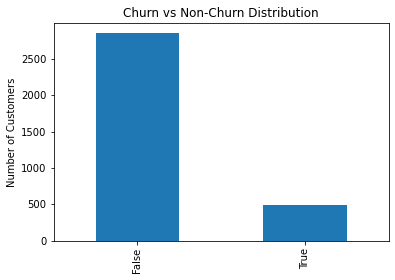

In [331]:
# Visualize the distribution of churn vs non-churn customers to assess class imbalance

df["churn"].value_counts().plot(kind="bar")
plt.title("Churn vs Non-Churn Distribution")
plt.ylabel("Number of Customers")
plt.show()

## 3. Data Preparation

In [332]:
# Drop identifier column that does not carry predictive information
df = df.drop(columns=["phone number", "area code", "state"])
df.columns


Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [333]:
# Separate features and target variable
X = df.drop(columns=["churn"])
y = df["churn"]


In [334]:
X.shape, y.shape

((3333, 17), (3333,))

In [335]:
#Splitting data into Training and Test sets using stratify to ensure the same class distribution in train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 


In [336]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


False    0.854573
True     0.145427
Name: churn, dtype: float64

In [337]:
# identifying feature types
categorical_features = X_train.select_dtypes(include=["object"]).columns
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns

categorical_features, numeric_features


(Index(['international plan', 'voice mail plan'], dtype='object'),
 Index(['account length', 'number vmail messages', 'total day minutes',
        'total day calls', 'total day charge', 'total eve minutes',
        'total eve calls', 'total eve charge', 'total night minutes',
        'total night calls', 'total night charge', 'total intl minutes',
        'total intl calls', 'total intl charge', 'customer service calls'],
       dtype='object'))

In [338]:
# Correlation matrix for numeric features to check for multicollinearity and understand relationships between features and target variable
numeric_features = X_train.select_dtypes(include=["int64", "float64"])

corr_matrix = numeric_features.corr()


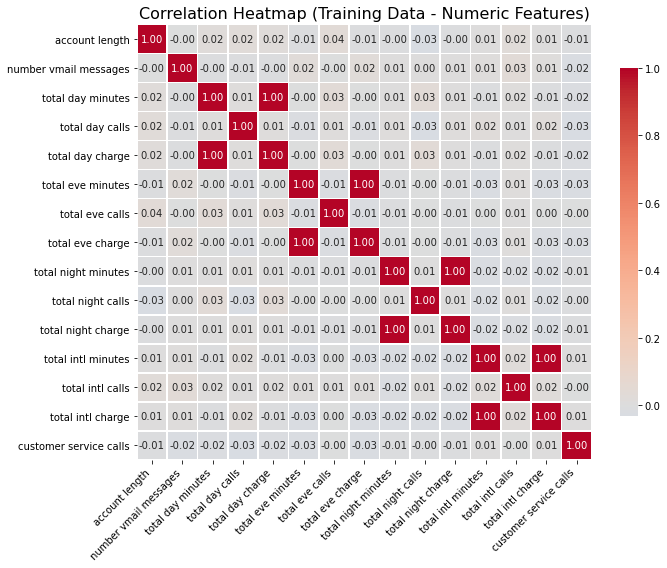

In [339]:
plt.figure(figsize=(10,8))

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=True,          # shows correlation values
    fmt=".2f",           # 2 decimal places
    linewidths=0.5,      # grid lines
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap (Training Data - Numeric Features)", fontsize=16)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()



#### Multicollinearity Assessment

The heatmap shows strong positive correlations between several pairs of features.

Notably, usage minutes and their corresponding charge variables exhibit near-perfect correlation (~1.0). 
This indicates linear dependence and potential multicollinearity.

To improve model stability and interpretability, one variable from each highly correlated pair will be removed before fitting the logistic regression model.


In [340]:
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j]
            ))

high_corr_pairs


[('total day charge', 'total day minutes', 0.9999999519905042),
 ('total eve charge', 'total eve minutes', 0.9999997724796893),
 ('total night charge', 'total night minutes', 0.9999991975711221),
 ('total intl charge', 'total intl minutes', 0.9999927568981057)]

In [341]:
X = X.drop(columns=[
    "total day charge",
    "total eve charge",
    "total night charge",
    "total intl charge"
])


#### Multicollinearity Resolution

Correlation analysis revealed near-perfect linear relationships between usage minutes and corresponding charge variables.

Because charge features are direct linear transformations of minutes, they introduce perfect multicollinearity.

To improve model stability and interpretability, charge variables were removed while retaining usage minutes.


In [342]:
# splitting data into training and test sets using stratify to ensure the same class distribution in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [343]:
# Preprocessing pipeline to standardize numeric features and one-hot encode categorical features
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)


In [344]:
# Baseline Logistic Regression model

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)


In [345]:
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)


###     4. Modelling

In [346]:
# Baseline Logistic Regression
baseline_log = LogisticRegression(
    max_iter=1000,
    random_state=42
)

baseline_log.fit(X_train_prepared, y_train)

# Predictions
y_test_pred = baseline_log.predict(X_test_prepared)
y_test_proba = baseline_log.predict_proba(X_test_prepared)[:,1]

# Evaluation
print("Baseline Classification Report")
print(classification_report(y_test, y_test_pred))

print("Baseline ROC-AUC:", roc_auc_score(y_test, y_test_proba))



Baseline Classification Report
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.55      0.25      0.34        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.63       667
weighted avg       0.83      0.86      0.84       667

Baseline ROC-AUC: 0.8178875022608065


In [347]:
# Accuracy on training and test sets to check for overfitting
print("Train Accuracy:", accuracy_score(y_train, baseline_log.predict(X_train_prepared)))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.8619654913728432
Test Accuracy: 0.8605697151424287


In [348]:
log_weighted = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_weighted.fit(X_train_prepared, y_train)

y_test_pred_weighted = log_weighted.predict(X_test_prepared)
y_test_proba_weighted = log_weighted.predict_proba(X_test_prepared)[:,1]

print("Weighted Classification Report")
print(classification_report(y_test, y_test_pred_weighted))

print("Weighted ROC-AUC:", roc_auc_score(y_test, y_test_proba_weighted))


Weighted Classification Report
              precision    recall  f1-score   support

       False       0.95      0.76      0.84       570
        True       0.35      0.74      0.47        97

    accuracy                           0.76       667
   macro avg       0.65      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667

Weighted ROC-AUC: 0.8154096581660336


In [350]:

param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "class_weight": [None, "balanced"],
    "penalty": ["l2"]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000, solver="liblinear"),
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid.fit(X_train_prepared, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV ROC-AUC:", grid.best_score_)


Best Parameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
Best CV ROC-AUC: 0.8193411851306589


In [351]:
best_log = grid.best_estimator_

y_test_pred_best = best_log.predict(X_test_prepared)
y_test_proba_best = best_log.predict_proba(X_test_prepared)[:,1]

print("Final Tuned Model")
print(classification_report(y_test, y_test_pred_best))
print("Final ROC-AUC:", roc_auc_score(y_test, y_test_proba_best))


Final Tuned Model
              precision    recall  f1-score   support

       False       0.95      0.76      0.84       570
        True       0.34      0.74      0.47        97

    accuracy                           0.76       667
   macro avg       0.64      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667

Final ROC-AUC: 0.8149032374751312


## Model 2 - Decision Tree Classifier

In [352]:

# Baseline Decision Tree
tree = DecisionTreeClassifier(
    random_state=42
)

tree.fit(X_train_prepared, y_train)

# Predictions
y_test_pred_tree = tree.predict(X_test_prepared)
y_test_proba_tree = tree.predict_proba(X_test_prepared)[:,1]

# Evaluation
print("Decision Tree Classification Report")
print(classification_report(y_test, y_test_pred_tree))

print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_test_proba_tree))


Decision Tree Classification Report
              precision    recall  f1-score   support

       False       0.94      0.95      0.95       570
        True       0.69      0.63      0.66        97

    accuracy                           0.91       667
   macro avg       0.82      0.79      0.80       667
weighted avg       0.90      0.91      0.90       667

Decision Tree ROC-AUC: 0.7907487791644059


In [353]:
print("Train Accuracy:", accuracy_score(y_train, tree.predict(X_train_prepared)))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_tree))


Train Accuracy: 1.0
Test Accuracy: 0.9055472263868066


In [354]:
param_grid_tree = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_tree,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid_tree.fit(X_train_prepared, y_train)

print("Best Parameters:", grid_tree.best_params_)
print("Best CV ROC-AUC:", grid_tree.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV ROC-AUC: 0.8935123356175987


## 5. Evaluation

## 6. Conclusion